In [1]:
import pynapple as nap
import numpy as np
import matplotlib.pyplot as plt

In [2]:
tsd = nap.Tsd(t=np.arange(10), d=np.random.rand(10))

In [3]:
print(tsd)
print(tsd.threshold(0.5,"below"))

Time (s)
----------  ----------
0           0.381666
1           0.523411
2           0.837739
3           0.818543
4           0.660205
5           0.83859
6           0.42836
7           0.00815511
8           0.847011
9           0.552218
dtype: float64, shape: (10,)
Time (s)
----------  ----------
0           0.381666
6           0.42836
7           0.00815511
dtype: float64, shape: (3,)


In [4]:
tsd.threshold?

Signature: tsd.threshold(thr, method='above')
Docstring:
Apply a threshold function to the tsd to return a new tsd
with the time support being the epochs above/below/>=/<= the threshold

Parameters
----------
thr : float
    The threshold value
method : str, optional
    The threshold method ("above"[default], "below", "aboveequal", "belowequal")

Returns
-------
out: Tsd
    All the time points below/ above/greater than equal to/less than equal to the threshold

Raises
------
ValueError
    Raise an error if method is unknown.
RuntimeError
    Raise an error if thr is too high/low and no epochs is found.

Examples
--------
This example finds all epoch above 0.5 within the tsd object.

>>> import pynapple as nap
>>> tsd = nap.Tsd(t=np.arange(100), d=np.random.rand(100))
>>> newtsd = tsd.threshold(0.5)

The epochs with the times above/below the threshold can be accessed through the time support:

>>> tsd = nap.Tsd(t=np.arange(100), d=np.arange(100), time_units='s')
>>> tsd.threshold(50)

In [5]:
print(tsd.time_support)
print(tsd.threshold(0.5).time_support[0])

  index    start    end
      0        0      9
shape: (1, 2), time unit: sec.
  index    start    end
      0      0.5    5.5
shape: (1, 2), time unit: sec.


In [6]:
tsdframe = nap.TsdFrame(t = np.arange(0,100)/10, d=np.random.randn(100,3))

In [7]:
print(tsdframe)

Time (s)    0         1         2
----------  --------  --------  --------
0.0         1.89248   0.86448   -0.83385
0.1         -0.38691  -0.40949  -0.0822
0.2         -0.35454  -0.45998  0.54319
0.3         -0.44883  0.30748   -1.87574
0.4         -1.05533  -0.38325  -0.004
0.5         2.05144   -0.42392  1.38095
0.6         0.21946   1.10849   0.257
...         ...       ...       ...
9.3         -1.24303  -0.40564  -0.16322
9.4         -0.06512  -0.77305  0.5945
9.5         -0.12066  1.47364   2.7911
9.6         0.02258   -0.4259   -0.00632
9.7         -0.90121  -0.01256  2.69481
9.8         2.36912   -0.68132  1.49989
9.9         -1.09394  0.82031   -0.02424
dtype: float64, shape: (100, 3)


In [8]:
print(tsdframe.bin_average(1))

Time (s)           0         1         2
----------  --------  --------  --------
0.5          0.25652   0.36454   0.28371
1.5         -0.3674    0.09245  -0.2482
2.5          0.07774   0.18148  -0.24893
3.5          0.39144   0.70646   0.18469
4.5          0.21102  -0.1139   -0.22577
5.5          0.2047    0.75854  -0.07218
6.5          0.21784  -0.02379   0.30532
7.5         -0.04217   0.00876  -0.11441
8.5          0.19353  -0.11602  -0.22241
9.5          0.08382   0.28722   0.66977
dtype: float64, shape: (10, 3)


In [10]:
nap.load_file?

Signature: nap.load_file(path, lazy_loading=None)
Docstring:
Load file. Current format supported is (npz,nwb,)

.npz -> If the file is compatible with a pynapple format, the function will return a pynapple object.
Otherwise, the function will return the output of numpy.load

.nwb -> Return the pynapple.io.NWBFile class wrapping the NWBFile

Parameters
----------
path : str
    Path to the file
lazy_loading : bool, optional default True
    Lazy loading of the data. If not specified, the function will use the defaults
    True. Works only with NWB files.

Returns
-------
(Tsd, TsdFrame, Ts, IntervalSet, TsGroup, pynapple.io.NWBFile)
    One of the 5 pynapple objects or pynapple.io.NWBFile

Raises
------
FileNotFoundError
    If file is missing
File:      c:\users\acer\anaconda3\envs\pynapple\lib\site-packages\pynapple\io\misc.py
Type:      function

In [11]:
from os.path import dirname, join as pjoin
import scipy.io as sio

In [21]:
data_dir = pjoin('C:\\Users\\Acer\\Documents\\compNeuroProjects\\neural_reco_offline\\Duszkiewicz2024', 'Dataset_2', 'A3701-191119', 'Data')

In [23]:
mat_fname = pjoin(data_dir, 'SpikeData.mat')

In [24]:
mat_fname

'C:\\Users\\Acer\\Documents\\compNeuroProjects\\neural_reco_offline\\Duszkiewicz2024\\Dataset_2\\A3701-191119\\Data\\SpikeData.mat'

In [25]:
spike_data = sio.loadmat(mat_fname, spmatrix=False)

In [28]:
sorted(spike_data.keys())

['S',
 'S_Info',
 '__globals__',
 '__header__',
 '__version__',
 'cellIx',
 'cellIx_Info',
 'shank',
 'shank_Info']

In [45]:
dir(spike_data['S'])

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul

In [59]:
spike_data['S'][0][0][0]

array([[MatlabObject([[(array(['ts'], dtype='<U2'), MatlabObject([[(MatlabObject([[(array(['time_units'], dtype='<U10'), MatlabObject([[(array(['time'], dtype='<U4'), array(['ts'], dtype='<U2'), array([[1]], dtype=uint8))]],
                                                                  dtype=[('quantity', 'O'), ('unit', 'O'), ('value', 'O')]))                                                                      ]],
                                                   dtype=[('t', 'O'), ('units', 'O')]), array([], shape=(0, 0), dtype=uint8), array([[1.18000000e-02],
                                             [2.36000000e-02],
                                             [3.54500000e-02],
                                             ...,
                                             [1.41180467e+04],
                                             [1.41181142e+04],
                                             [1.41181185e+04]]), array([], shape=(0, 0), dtype=uint8), array([], dtype='<U1'

In [60]:
import pymatreader

In [61]:
data_dict = pymatreader.read_mat(mat_fname)

In [63]:
data_dict.keys()

dict_keys(['__header__', '__version__', '__globals__', 'S', 'S_Info', 'shank', 'shank_Info', 'cellIx', 'cellIx_Info'])

In [75]:
len(data_dict["S"]['C'])

102

In [74]:
data_dict['cellIx']

array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103], dtype=uint8)

In [82]:
sp_times = data_dict["S"]['C'][0]['tsd']['t']

(2000.0, 2010.0)

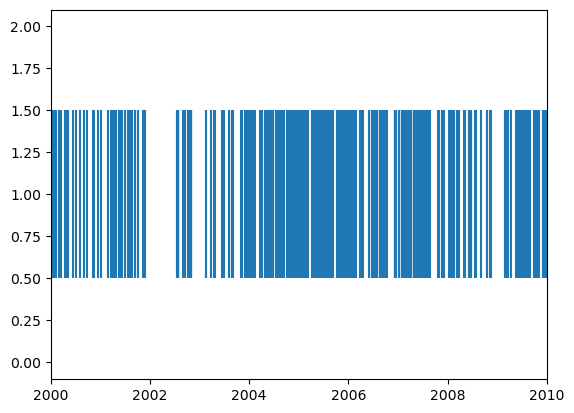

In [86]:
plt.eventplot(sp_times)
ax = plt.gca()
ax.set_xlim([2000,2010])